In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [53]:
import os
import pandas as pd

dataFolder = r"/home/jack/Desktop/pothole_classification/"

labels = []

for folder in ["normal/", "potholes/"]:
    for filename in os.listdir(dataFolder+folder):
        labels.append([dataFolder+folder+filename, int(folder == "potholes/")])


labelDf = pd.DataFrame(labels, columns=["filename","class"])


    
    

In [54]:
labelDf


,filename,class
0,/home/jack/Desktop/pothole_classification/norm...,0
1,/home/jack/Desktop/pothole_classification/norm...,0
2,/home/jack/Desktop/pothole_classification/norm...,0
3,/home/jack/Desktop/pothole_classification/norm...,0
4,/home/jack/Desktop/pothole_classification/norm...,0
...,...,...
676,/home/jack/Desktop/pothole_classification/poth...,1
677,/home/jack/Desktop/pothole_classification/poth...,1
678,/home/jack/Desktop/pothole_classification/poth...,1
679,/home/jack/Desktop/pothole_classification/poth...,1


In [55]:
from PIL import Image

def retrieveImage(fPath):
    pic = np.asarray(Image.open(fPath).convert('RGB').resize((128,128))) / 255.0
    return pic

In [56]:
X = np.array(labelDf.filename.apply(retrieveImage).tolist())
Y = labelDf[['class']].to_numpy()

In [57]:
print(X.shape)
print(Y.shape)

(681, 128, 128, 3)
(681, 1)


In [58]:
class_names = ["normal", "potholes"]

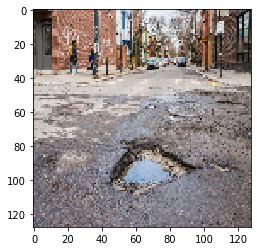

In [59]:
plt.figure()
plt.imshow(X[600])
plt.grid(False)
plt.show()

In [60]:
X = X / 255.0

/home/jack/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


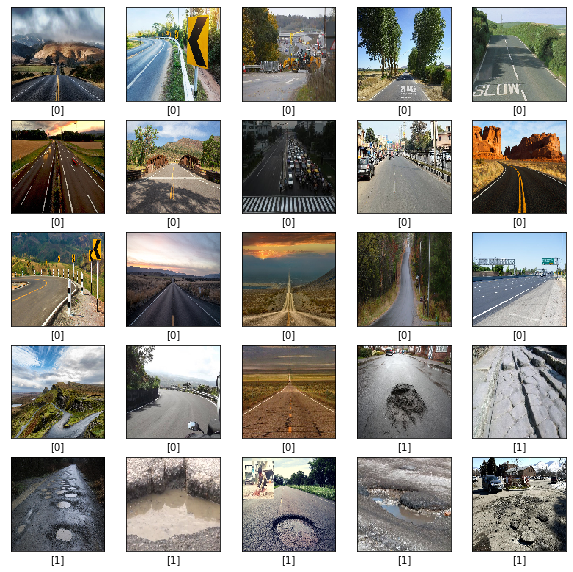

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i*20]*255.0, cmap=plt.cm.binary)
    plt.xlabel(Y[i*20])
plt.show()

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(128,128,3)),
    keras.layers.Dense(256*2, activation='relu'),
    keras.layers.Dense(256*2, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [93]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [94]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(X,Y,test_size=0.2, shuffle = True)

In [95]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
544/544 [==============================] - 2s 4ms/sample - loss: 0.7028 - acc: 0.5423
Epoch 2/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.6528 - acc: 0.6140
Epoch 3/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.5957 - acc: 0.6581
Epoch 4/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.5304 - acc: 0.7408
Epoch 5/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.4988 - acc: 0.7592
Epoch 6/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.4824 - acc: 0.7647
Epoch 7/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.4403 - acc: 0.8015
Epoch 8/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.4026 - acc: 0.8309
Epoch 9/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.3671 - acc: 0.8511
Epoch 10/30
544/544 [==============================] - 2s 3ms/sample - loss: 0.3526 - acc: 0.8548
Epoch 11/30
544/544 [========

In [97]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


137/137 - 0s - loss: 0.3655 - acc: 0.8686

Test accuracy: 0.8686131
